# Data Science And Business Analytics Internship

## The Spark Foundation  : #GRIPAPRIL21

## Author                 : Yogita Anil Mahajan

### Task 2                       : Prediction Using Unsupervised ML

### Problem Statement : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it    visually.


# ---------------------------------------------------------------------------------------------------------------

### Importing all the Required Libraries

In [1]:
import pandas as pd                # used for reading dataset, manipulating and analyzing data
import numpy as np                 # library that provides a multidimensional array object
import matplotlib.pyplot as plt    # used for visualization of data
from sklearn.cluster import KMeans #used to implement K Means Algorithm

%matplotlib inline

### Reading Dataset

In [2]:
# Reading dataset

iris_df = pd.read_csv(r"D:\Spark_foundation\Iris.csv")

print("Data imported successfully")

# shape is a property which is used to get a tuple representing the Dimensionality of DataFrame
print("shape of the Dataset is: ",iris_df.shape)

Data imported successfully
shape of the Dataset is:  (150, 6)


In [3]:
#Showing Top 10 Records from dataset

iris_df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


### More Information about the dataset

In [4]:
#info() method gives all the information about the dataset like column names, number of records present in each column etc.

iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Check for Null Values if any

In [5]:
# isnull() method check for null values present in the dataset and sum() will returns total number of null values present in
# each column of dataset

iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### There is No Null values present in our dataset

### Statistical summary of dataset

In [6]:
#describe() method is used to display basic statistical information about the dataset like count,mean,min,max,std,percentile etc

iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Data Pre-processing

In [7]:
#get data from columns SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm

x =iris_df.iloc[:, [1,2,3,4]].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

### Elbow Method for predicting Optimum number of Clusters

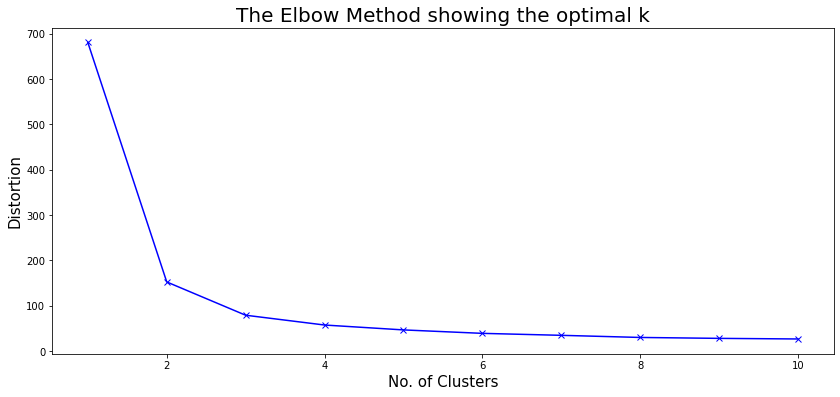

In [8]:
#Running K-Means with a range of k which can be 1 to 11
#We can easily run K-Means for a range of clusters using a for loop and collecting the distortions into a list.

#Distortion: It is calculated as the average of the squared distances from the cluster centers of the respective clusters.
#            Typically, the Euclidean distance metric is used.
#Inertia: It is the sum of squared distances of samples to their closest cluster center.
    
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(x)
    distortions.append(kmeanModel.inertia_)
    
#Plotting the distortions of K-Means
plt.figure(figsize=(14, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('No. of Clusters',fontsize=15)
plt.ylabel('Distortion', fontsize=15)
plt.title('The Elbow Method showing the optimal k', fontsize=20)
plt.show()

#### From The above Graph we can see that distortion value doesn't decrease significantly with every iteration after k=3

#### We can observe that the “elbow” is the number 3 which is optimal for this case. Now we can run a K-Means using as n_clusters as 3

In [9]:
#creating Kmeans Classifier

kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [10]:
#finding centroid for each cluster
centroids = kmeans.cluster_centers_
centroids

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [11]:
#Three clusters are formed
cluster_labels = np.unique(y_kmeans)
cluster_labels

array([0, 1, 2])

In [12]:
#Unique Species available 
labels=iris_df['Species'].unique()
labels

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Data Visualization

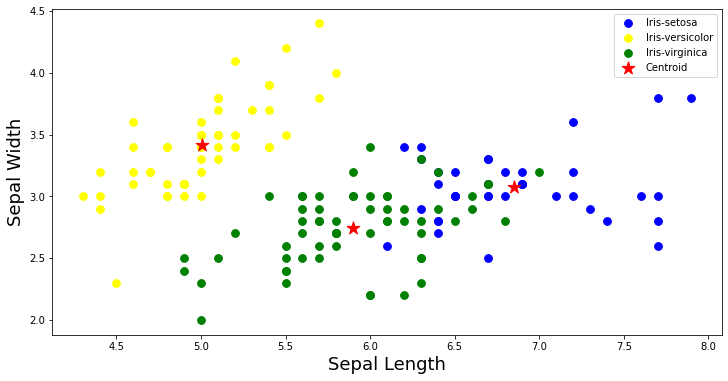

In [13]:
#Visualizing The clusters for Sepal Length vs Sepal Width

plt.figure(figsize=(12,6))
colours=['blue','yellow','green']
for i in cluster_labels:
    plt.scatter(x[y_kmeans == i , 0] , x[y_kmeans == i , 1] , s=60, label = labels[i],color=colours[i])
    
#plotting centroids

plt.scatter(centroids[:,0] , centroids[:,1] , s = 180, marker="*", color = 'red',label='Centroid')
plt.legend()
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)
plt.show()

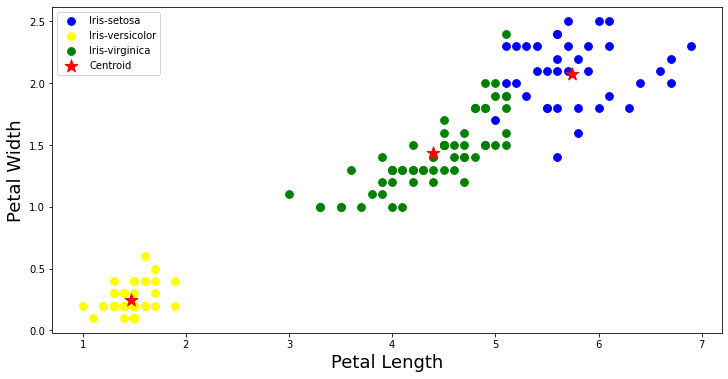

In [14]:
#Visualizing The clusters for Petal Length vs Petal Width

plt.figure(figsize=(12,6))
colours=['blue','yellow','green']
for i in cluster_labels:
    plt.scatter(x[y_kmeans == i , 2] , x[y_kmeans == i , 3] , s=60, label = labels[i],color=colours[i])

#plotting centroid
plt.scatter(centroids[:,2] , centroids[:,3] , s = 180, marker="*", color = 'red',label='Centroid')
plt.legend()

plt.xlabel('Petal Length', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)
plt.show()    

### Conclusion:
###### 1) From Above Graphs we can See that dataset is divided into 3 clusters and their respective Centroids are plotted
###### 2) Computational Cost of K means is O(k *  n  *  d) where k is number of clusters , n is number of datapoints  and d is number of attributes.
###### 3) compared to other clustering methods,The K Means clustering Technique is fast and Efficient in Terms of its Computational Cost
    
    

# Thank You!